# Freesound Pitch Estimation Assessment
In this document the quality of the Freesound Pitch estimation algorithm applied to single-note sounds will be assessed. From this assessment possible improvements to the algorithm or the usage of the algorithm are proposed and assessed.

In [1]:
# import some libraries:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# load some utillity functions
import util as ut
# load results:
from loadResults import *

done


# 0: Introduction
In this document the performance of the pitch estimation algorithm used by Freesound to estimate the pitches of sounds on single-note sounds will be assessed. This assessment will consist of a observation of the quality of the estimation, followed by a discussion on factors able to predict the quality of this estimation. Lastly possible improvements to the algorithm or the useage of the algorithm will be proposed and discussed.

# 1: The Sounds
The sounds used in this assessment come partly form Freesound and partly from two non-Freesound sources. The Freesound sounds come from two different sources: the sounds uploaded by the users Carlos Vaquero and the sounds containing the tag 'good-sounds'. The non-Freesound sounds come from two sources mentioned in the masterthesis "Improving the description of instrumental sounds by using ontologies and automatic content analysis" by Carlos Vaquero (Vaquero, 2012). Namely sounds from the Philharmonia Orchestra [$REF$] and the piano pack from The University of Iowa Musical Instrument Samples (or as they call it MIS) [$REF$]. 

## 1.1: Contents of the sounds
All of the sounds are single-note sounds from real instruments. The sounds from the user Carlos Vaquero are recordings from different western instruments containting, among others, acoustic guitar, recorder, bassoon, several bowed instruments (played plucked and bowed with different techniques). The sounds with the tag 'good-sounds' are also single-notes of several western instruments, but only played with a 'normal' playing technique. The sounds from the Philharmonia Orchestra are several (vast) collections of sounds from different instruments of the orchestra, played in a wide range of techniques. The sounds chosen fro m the Philharmonia Orchestra are the cello, clarinet, guitar and violin. Lastly the sounds taken from the University of IOWA include piano, cello, trumpet, marimba and xylophone. All the sounds had to be checked to make sure no sounds with multiple pitches or ambiguous pitches were included into the calculation.

Below the amount of sounds contained in each pack as well as the distribution of the annotated pitches are shown:

Amount of sounds per source:
Freesound:
	Carlos		470 sounds
	good-sounds:	113 sounds
non-Freesound:
	Philharmonia:	2973 sounds
	IOWA:		639 sounds

Total:			4195 sounds

Annotated pitch distributions:


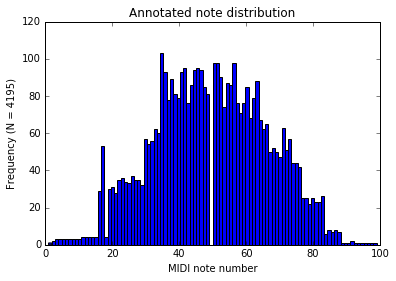

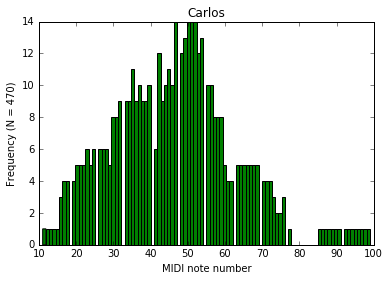

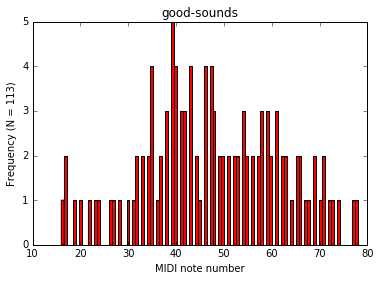

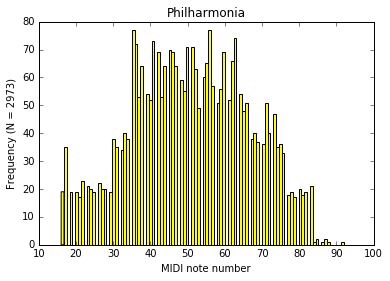

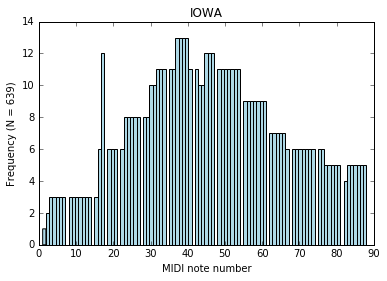

In [2]:
print "Amount of sounds per source:"
print "Freesound:\n\tCarlos\t\t" + str(csN) + " sounds\n\tgood-sounds:\t" + str(gsN) + " sounds"
print "non-Freesound:\n\tPhilharmonia:\t" + str(phN) + " sounds\n\tIOWA:\t\t" + str(iwN) + " sounds\n" 
N = csN + gsN + phN + iwN
print "Total:\t\t\t" + str(N) + " sounds\n"
print "Annotated pitch distributions:"
pTag = pool['annotated.pitch']; midi = ut.freq2midi(pTag)
plt.hist(midi, bins=100); plt.title("Annotated note distribution"); plt.xlabel("MIDI note number"); plt.ylabel("Frequency (N = " + str(N) + ")");  plt.show();
plt.hist(midi[:csN], bins=100, color='green'); plt.title("Carlos"); plt.xlabel("MIDI note number"); plt.ylabel("Frequency (N = " + str(csN) + ")"); plt.show();
plt.hist(midi[csN:csN+gsN], bins=100, color='red'); plt.title("good-sounds"); plt.xlabel("MIDI note number"); plt.ylabel("Frequency (N = " + str(gsN) + ")"); plt.show();
plt.hist(midi[csN+gsN:csN+gsN+phN], bins=100, color='yellow'); plt.title("Philharmonia"); plt.xlabel("MIDI note number"); plt.ylabel("Frequency (N = " + str(phN) + ")"); plt.show();
plt.hist(midi[csN+gsN+phN:], bins=100, color='lightblue'); plt.title("IOWA"); plt.xlabel("MIDI note number"); plt.ylabel("Frequency (N = " + str(iwN) + ")"); plt.show();

### 1.2 Comparison of Freesound and locally computed data
The data is computated locally trying to reproduce the data obtained from Freesound. Ideally the values obtained trough local calculation and central calculation at uploadtime will be the same, although some small differences may occur. Below are the differences obtained between the Freesounddata and the locally calculated data.

The Freesound pitch estimation is done using the pitchYinFFT algorithm contained in the Essentia library [$REF$]. The pitchYinFFT is a optimalisation for reduced calculation time of the YIN algorithm. The performance of the pitch estimation algortihm will be assessed by comparing the pitch estimated by the algorithm against the pitch annotated for that sound, taken either from the filename of the descriptions and/or tags of the sounds.

Pitch estimation:
	Freesound:	μ: 411.667 Hz	(σ: 305.264 Hz)
	Local:		μ: 417.041 Hz	(σ: 309.538 Hz)
Difference:		11.0239 Hz

Confidence:
	Freesound:	μ: 0.734088	(σ: 0.152733)
	Local:		μ: 0.726825	(σ: 0.155668)
Difference:		0.00783782

Confidence:
	Freesound:	μ: 0.468032	(σ: 0.135647)
	Local:		μ: 0.467246	(σ: 0.135743)
Difference:		0.00548843



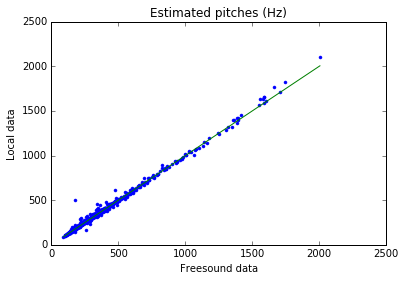

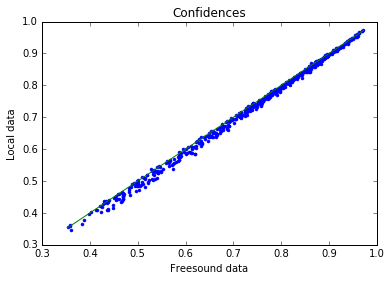

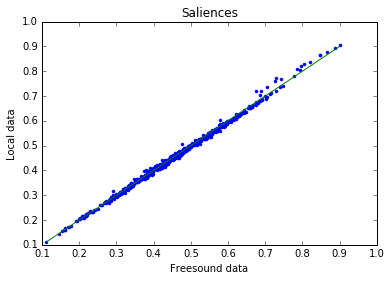

Minimal and maximal values:
Estimated pitches:
	Freesound:	[89.9533Hz,	2004.75Hz]
	Local:		[89.1426Hz,	2105.35Hz]
Confidences:
	Freesound:	[0.353488,	0.971915]
	Local:		[0.34735,	0.974891]
Saliences:
	Freesound:	[0.111462,	0.900048]
	Local:		[0.109506,	0.906102]


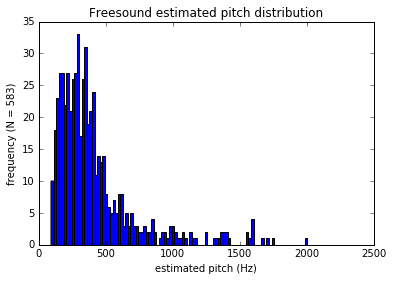

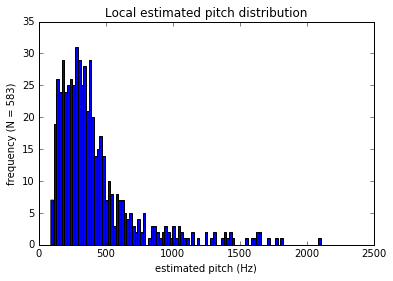

In [39]:
frs_pEst = frsPool['analysis.lowlevel.pitch.mean'];
loc_pEst = locPool['lowLevel.pitch.mean']
print "Pitch estimation:"
print "\tFreesound:\tμ: " + str(np.mean(frs_pEst)) + " Hz\t(σ: " + str(np.std(frs_pEst)) + " Hz)"
print "\tLocal:\t\tμ: " + str(np.mean(loc_pEst)) + " Hz\t(σ: " + str(np.std(loc_pEst)) + " Hz)"
print "Difference:\t\t" + str(np.mean(abs(frs_pEst - loc_pEst))) + " Hz\n"

frs_conf = frsPool['analysis.lowlevel.pitch_instantaneous_confidence.mean']
loc_conf = locPool['lowLevel.pitch_instantaneous_confidence.mean']
print "Confidence:"
print "\tFreesound:\tμ: " + str(np.mean(frs_conf)) + "\t(σ: " + str(np.std(frs_conf)) + ")"
print "\tLocal:\t\tμ: " + str(np.mean(loc_conf)) + "\t(σ: " + str(np.std(loc_conf)) + ")"
print "Difference:\t\t" + str(np.mean(abs(frs_conf - loc_conf))) + "\n"

frs_sal = frsPool['analysis.lowlevel.pitch_salience.mean']
loc_sal = locPool['lowLevel.pitch_salience.mean']
print "Confidence:"
print "\tFreesound:\tμ: " + str(np.mean(frs_sal)) + "\t(σ: " + str(np.std(frs_sal)) + ")"
print "\tLocal:\t\tμ: " + str(np.mean(loc_sal)) + "\t(σ: " + str(np.std(loc_sal)) + ")"
print "Difference:\t\t" + str(np.mean(abs(frs_sal - loc_sal))) + "\n"

plt.plot(frs_pEst, loc_pEst, '.'); plt.title('Estimated pitches (Hz)'); plt.xlabel('Freesound data'); plt.ylabel('Local data'); plt.plot([min(frs_pEst), max(frs_pEst)], [min(frs_pEst), max(frs_pEst)]); plt.show()
plt.plot(frs_conf, loc_conf, '.'); plt.title('Confidences'); plt.xlabel('Freesound data'); plt.ylabel('Local data');  plt.plot([min(frs_conf), max(frs_conf)], [min(frs_conf), max(frs_conf)]); plt.show()
plt.plot(frs_sal, loc_sal, '.'); plt.title('Saliences'); plt.xlabel('Freesound data'); plt.ylabel('Local data');  plt.plot([min(frs_sal), max(frs_sal)], [min(frs_sal), max(frs_sal)]); plt.show()

print "Minimal and maximal values:"
print "Estimated pitches:"
print "\tFreesound:\t[" + str(min(frs_pEst)) + "Hz,\t" + str(max(frs_pEst)) + "Hz]"
print "\tLocal:\t\t[" + str(min(loc_pEst)) + "Hz,\t" + str(max(loc_pEst)) + "Hz]"
print "Confidences:"
print "\tFreesound:\t[" + str(min(frs_conf)) + ",\t" + str(max(frs_conf)) + "]"
print "\tLocal:\t\t[" + str(min(loc_conf)) + ",\t" + str(max(loc_conf)) + "]"
print "Saliences:"
print "\tFreesound:\t[" + str(min(frs_sal)) + ",\t" + str(max(frs_sal)) + "]"
print "\tLocal:\t\t[" + str(min(loc_sal)) + ",\t" + str(max(loc_sal)) + "]"

plt.hist(frs_pEst, bins=100); plt.title("Freesound estimated pitch distribution"); plt.xlabel("estimated pitch (Hz)"); plt.ylabel("frequency (N = " + str(len(frs_pEst)) + ")"); plt.show();
plt.hist(loc_pEst, bins=100); plt.title("Local estimated pitch distribution"); plt.xlabel("estimated pitch (Hz)"); plt.ylabel("frequency (N = " + str(len(loc_pEst)) + ")"); plt.show();

The data obtained from Freesound and the locally computated data are similar enough to focus on the locally computed data in the rest of the assessment.

# 2: The Assessment